<div class="output_png output_subarea output_execute_result">
<center>
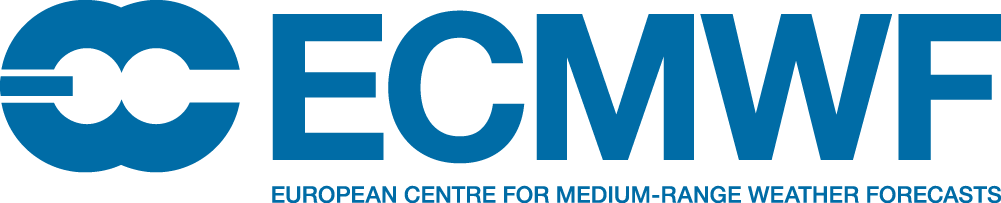</center>
</div>

# 	Ensemble mean and spread for 2m temperature

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-2t-mean-spread

Access to ECMWF Open data is governed by the following [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).    

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameters :

* [2 metre temperature](https://apps.ecmwf.int/codes/grib/param-db/?id=167)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> Skip this cell if you already have these libraries installed
</div>

In [ ]:
import sys
!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [2]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("https://ai4edataeuwest.blob.core.windows.net/ecmwf", beta=True)

In [4]:
parameters = ['2t']
filename = 'medium-2t-mean-spread.grib'
filename

'medium-2t-mean-spread.grib'

To calculate the mean and spread of 2m Temperature, we need to retrieve all the ensemble members at the given time.  
Setting the **type** to **ef** will download all 50 ensemble members as well as the control forecast.

In [4]:
client.retrieve(
    date=-2,
    time=0,
    step=72,
    stream="enfo",
    type="ef",
    levtype="sfc",
    param=parameters,
    target=filename
)

In [5]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20220103,0,72,"0,1,...",167,od,enfo,"cf,pf",0001


And specifying the parameter shortName in the describe function, we can get more detailed information about the data.

In [7]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20220103
time,0
step,72
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,39,regular_ll
1,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,1,regular_ll
2,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,13,regular_ll
3,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,20,regular_ll
4,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,17,regular_ll
5,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,41,regular_ll
6,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,35,regular_ll
7,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,38,regular_ll
8,ecmf,2t,heightAboveGround,2,20220103,0,72,pf,8,regular_ll


**ecmwf.data** has built in functions to calculate mean and standard deviation of a given fieldset.  
Since our data has only one date,time and step, mean() and stdev() will be calculated over the 51 ensemble members.

In [9]:
t2m_mean = ecdata.mean(data)
t2m_spread = ecdata.stdev(data) + 273.15

And finally, we can plot the data on the map. 

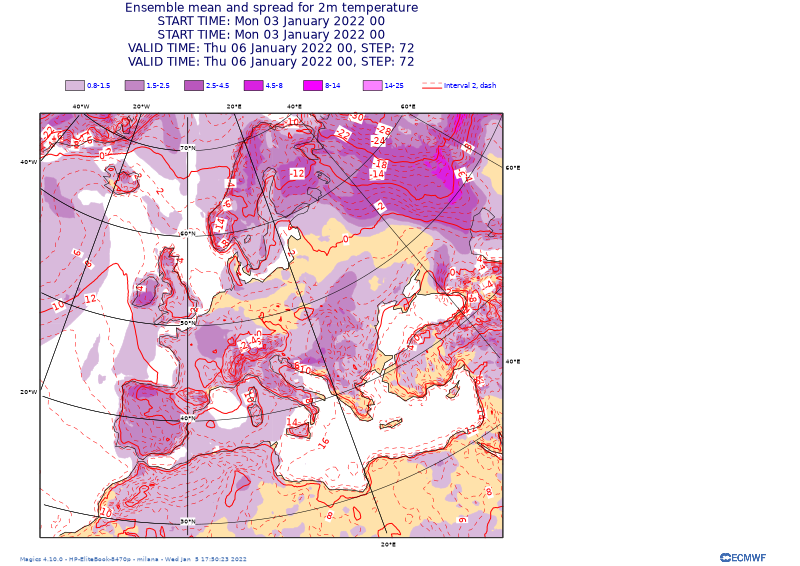

In [10]:
fig = GeoMap(area_name='europe', preset='background-foreground')


fig.contour_lines(t2m_spread, preset="sh_blu_f008t25")
fig.contour_lines(t2m_mean, preset="ct_red_i2_dash")
fig.title(["Ensemble mean and spread for 2m temperature", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' />",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"])
fig.show()